In [1]:
import os
import gzip
import shutil
import json
import pandas as pd
import _pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cluster_result = pickle.load(open('data/cluster_1000_3.pkl', 'rb'))


FileNotFoundError: [Errno 2] No such file or directory: 'data/cluster_1000_3.pkl'

In [4]:
cluster_result.head()

,pid,check,sgvs,label
0,27700103,2017-06-05 00:09:40.571000+00:00,"[125.0, 126.0, 127.0, 128.0, 128.0, 128.0, 128...",1
1,27700103,2017-06-05 00:39:39.226000+00:00,"[128.0, 127.0, 127.0, 124.0, 115.0, 112.0, 108...",2
2,27700103,2017-06-05 01:29:39.226000+00:00,"[108.0, 107.0, 106.0, 108.0, 114.0, 111.0, 106...",1
3,27700103,2017-06-05 02:09:39.104000+00:00,"[106.0, 107.0, 108.0, 108.0, 109.0, 110.0, 104...",1
4,27700103,2017-06-05 02:44:39.095000+00:00,"[104.0, 102.0, 103.0, 104.0, 104.0, 105.0, 108...",2


In [7]:
cluster_result['sgvs'].values

0    [125.0, 126.0, 127.0, 128.0, 128.0, 128.0, 128...
Name: sgvs, dtype: object

In [9]:
cluster_result['label'].describe()

count    1000.000000
mean        1.260000
std         0.779107
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: label, dtype: float64

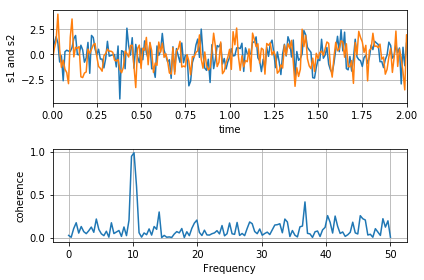

In [10]:
dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()